<a href="https://colab.research.google.com/github/MrCee95/Employee-Attrition/blob/main/Employee%20Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 #Importing all necessaary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#@title Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx to Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx


In [11]:
# Importing the dataset from excel file

excelfile=pd.ExcelFile("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx")

df_left=pd.read_excel(excelfile,'Employees who have left')  # Sheet 2
df_notleft=pd.read_excel(excelfile,'Existing employees')    # Sheet 3

In [12]:
#@title Reading file
df_left.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [14]:
#@title Reading file
df_notleft.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [17]:
#@title 
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [18]:
#@title Number of mployees in each department
df_left.dept.value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

In [19]:
# Combining the IT, support and Technical in one value as Technical

df_left['dept']=np.where(df_left['dept']=='support','technical',df_left['dept']).astype('str')
df_left['dept']=np.where(df_left['dept']=='IT','technical',df_left['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='support','technical',df_notleft['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='IT','technical',df_notleft['dept']).astype('str')

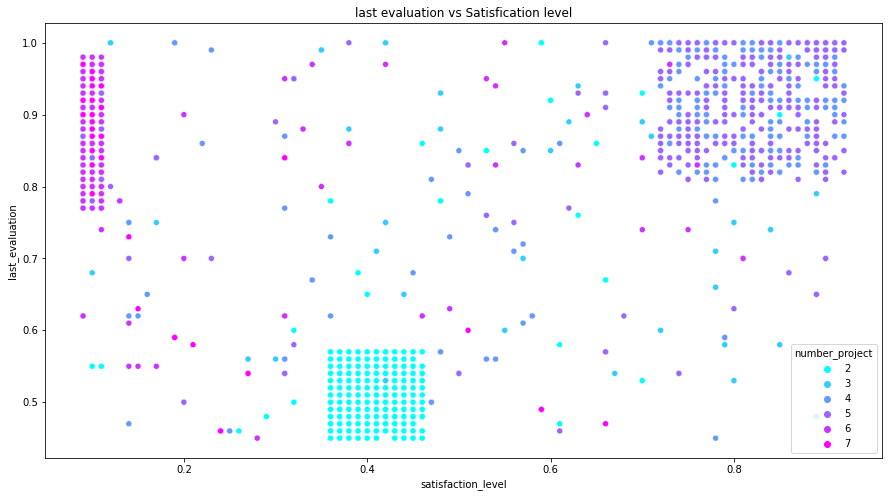

In [20]:
#@title Compare values of the employees based on each factor and the reason why they are leaving.
plt.figure(figsize=(15,8))
plt.title("last evaluation vs Satisfication level")
sns.scatterplot(x=df_left['satisfaction_level'],y=df_left['last_evaluation'],hue='number_project',data=df_left, palette='cool')
plt.show()